In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

In [2]:
ChangepointData = collections.namedtuple('CData', 
    ['x', 'y', 'ytrue'])
    #['H', 'Hinv', 'x', 'y', 'ytest', 'ytrue', 'btrue', 'bspline_bases', 'bspline_beta', 'snr'])

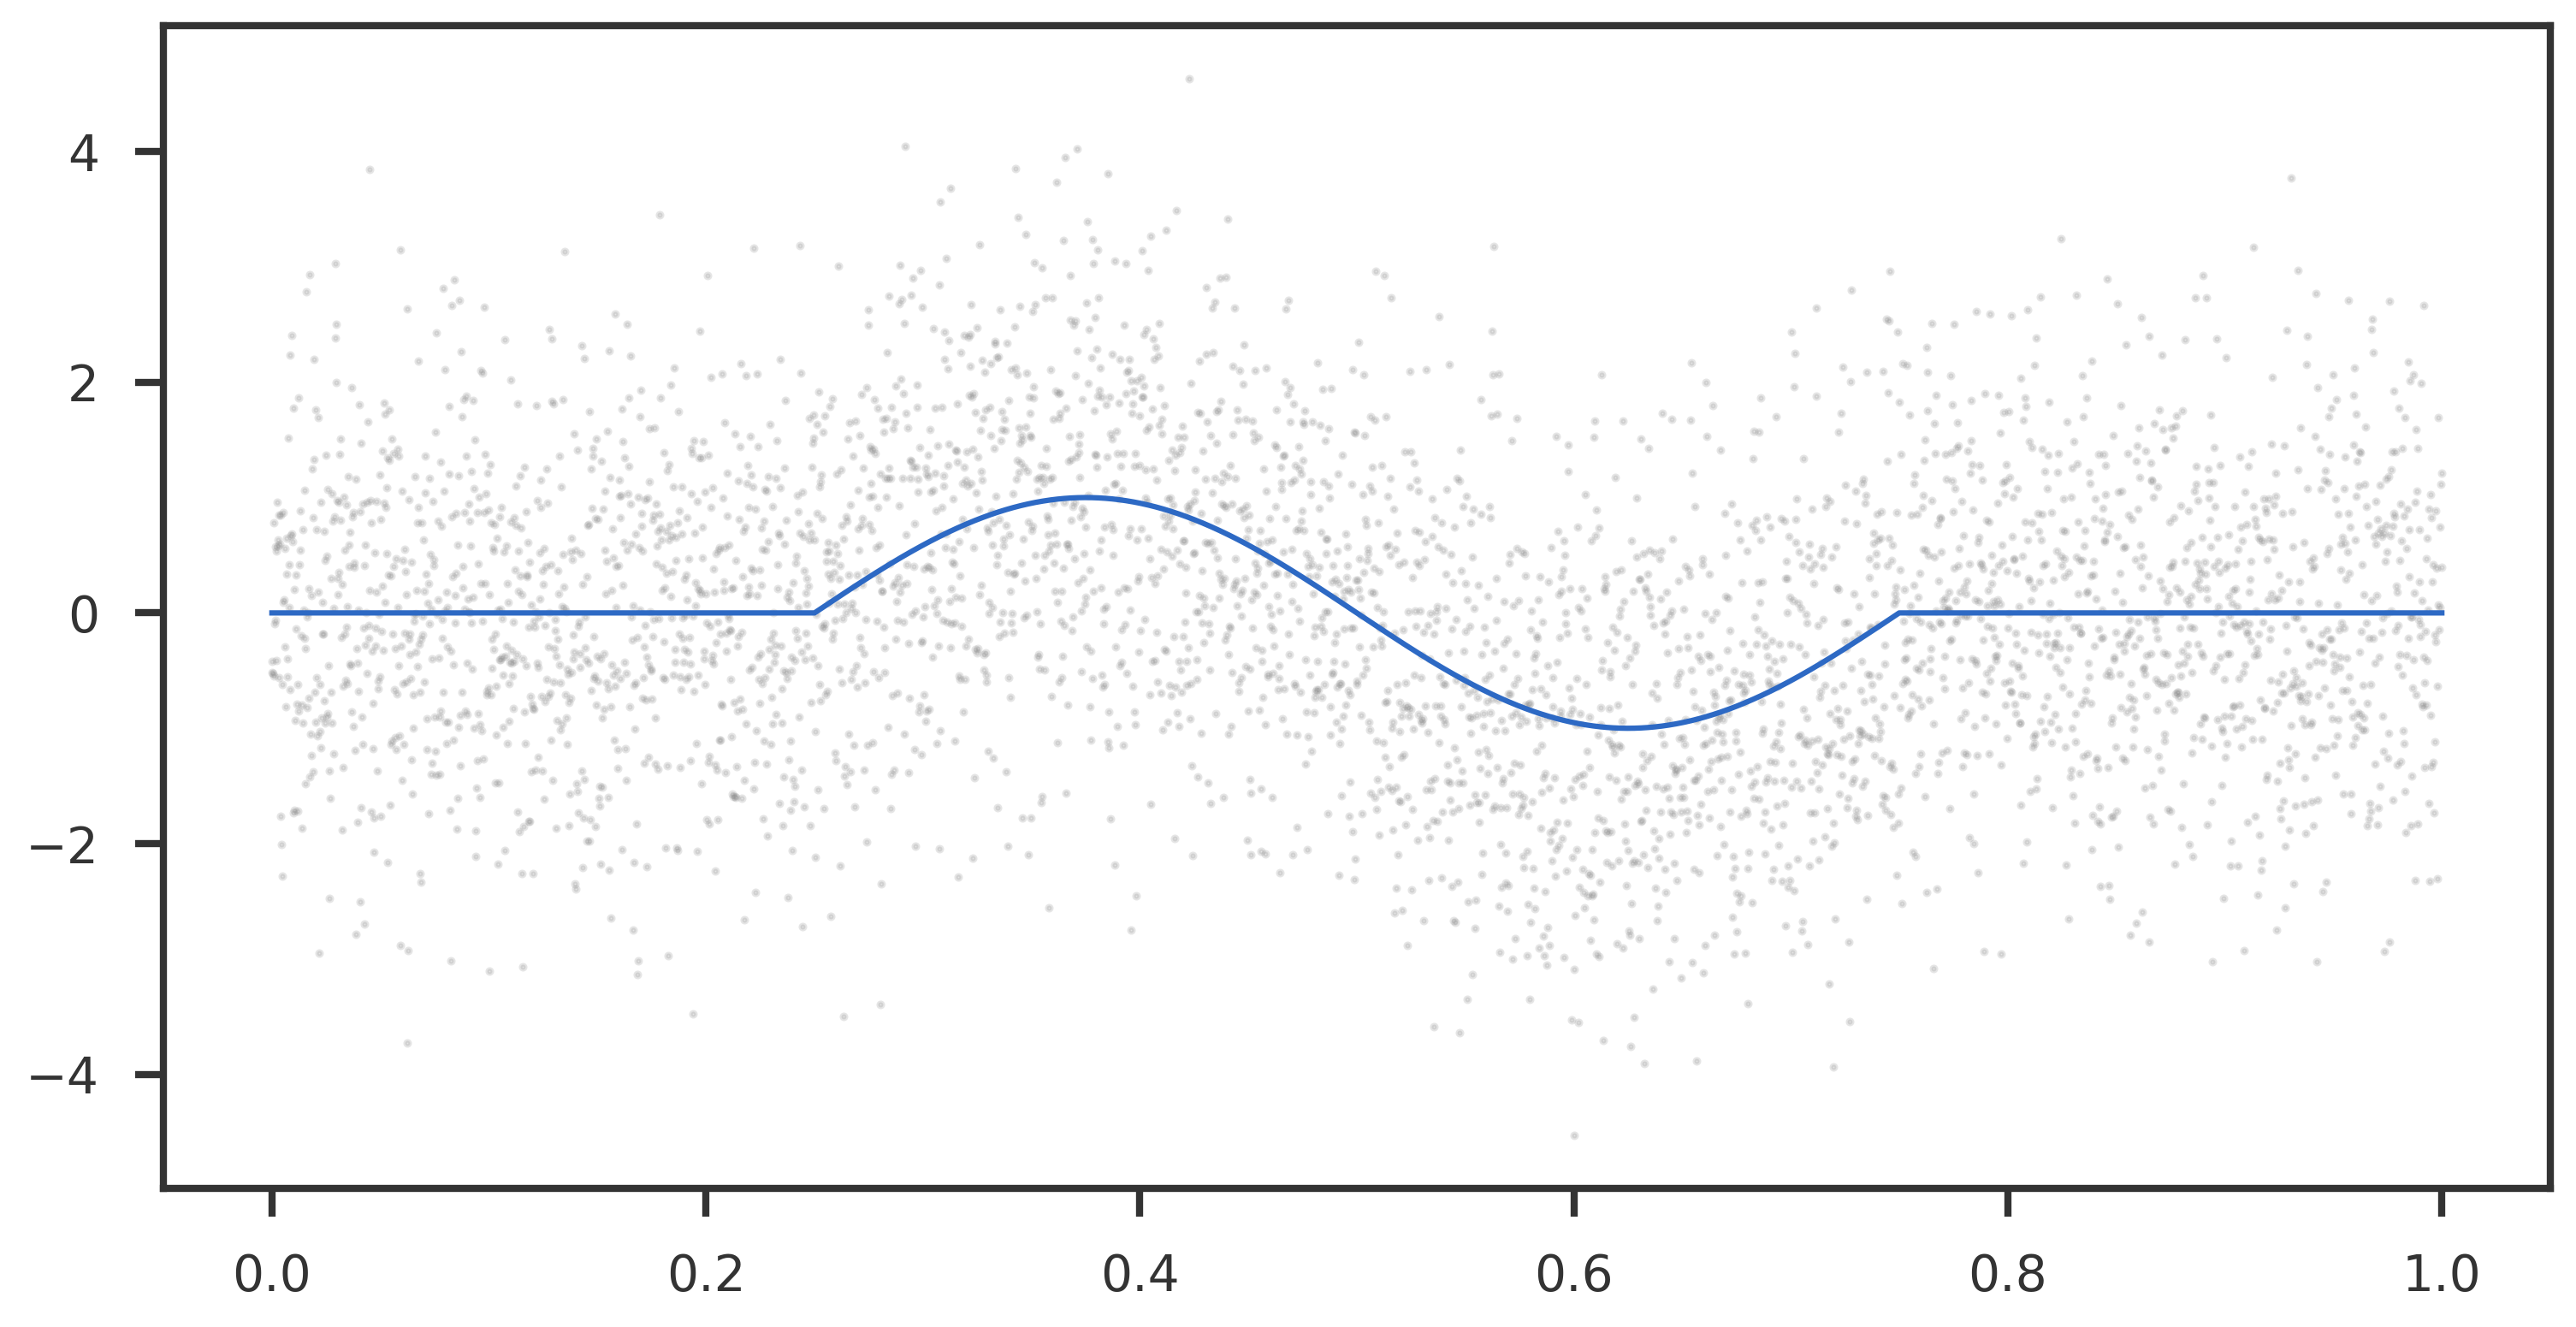

In [3]:
n = 4096
nzprop = 0.5
strue = 1.2

x = np.linspace(0, 1, n)
ytrue = np.zeros(n)
nzx0 = int((n - n * nzprop) / 2)
nzx1 = nzx0 + int(n * nzprop)
nzx  = x[nzx0:nzx1]
x0 = x[nzx0]
x1 = x[nzx1 - 1]
ytrue[nzx0:nzx1] = - np.sin(- np.pi + (nzx - x0) * (2.0 * np.pi) / (x1 - x0))

noise = np.random.normal(0, strue, size = n)
y = ytrue + noise

data = ChangepointData(x = x, y = y, ytrue = ytrue)


fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(x, ytrue)
plt.show()

In [4]:
degree = 0

In [5]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = degree)
#tf_bhat  = np.dot(data.Hinv, tf_y)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



R[write to console]: Loading required package: Matrix



In [27]:
prior_init = toy_priors.get_ash(k = 20, sparsity = None, skbase = 2.0)
gv1 = Trendfiltering(maxiter = 20000, standardize_basis = True, standardize = True)
gv1.fit(data.y, degree, prior_init)

In [28]:
gv2 = Trendfiltering(maxiter = 20000, standardize_basis = True, standardize = True)
gv2.fit(data.y, degree, prior_init, y_init = tf_y)

In [29]:
gv2.prior.w

array([4.82404475e-03, 9.55712266e-01, 5.82736400e-03, 2.57932849e-08,
       3.02132287e-13, 1.51330621e-16, 5.23232316e-18, 3.89835948e-18,
       1.38948974e-17, 7.32215277e-17, 2.87951699e-16, 6.33760009e-16,
       7.49819512e-16, 5.27871356e-16, 2.66526318e-16, 1.22981030e-16,
       6.95841200e-17, 7.41079306e-17, 5.12779089e-16, 3.36362996e-02])

In [30]:
gv1.prior.w

array([4.51413976e-34, 7.93422798e-34, 8.27851062e-37, 4.57383718e-42,
       1.00000000e+00, 7.77170642e-32, 7.09597476e-35, 5.32221850e-37,
       1.24663933e-39, 5.49722040e-35, 5.63129435e-36, 4.59809162e-38,
       2.44120789e-40, 1.02872498e-42, 3.75183225e-45, 1.26361919e-47,
       4.14040845e-50, 1.37803949e-52, 4.83596117e-55, 1.85045542e-57])

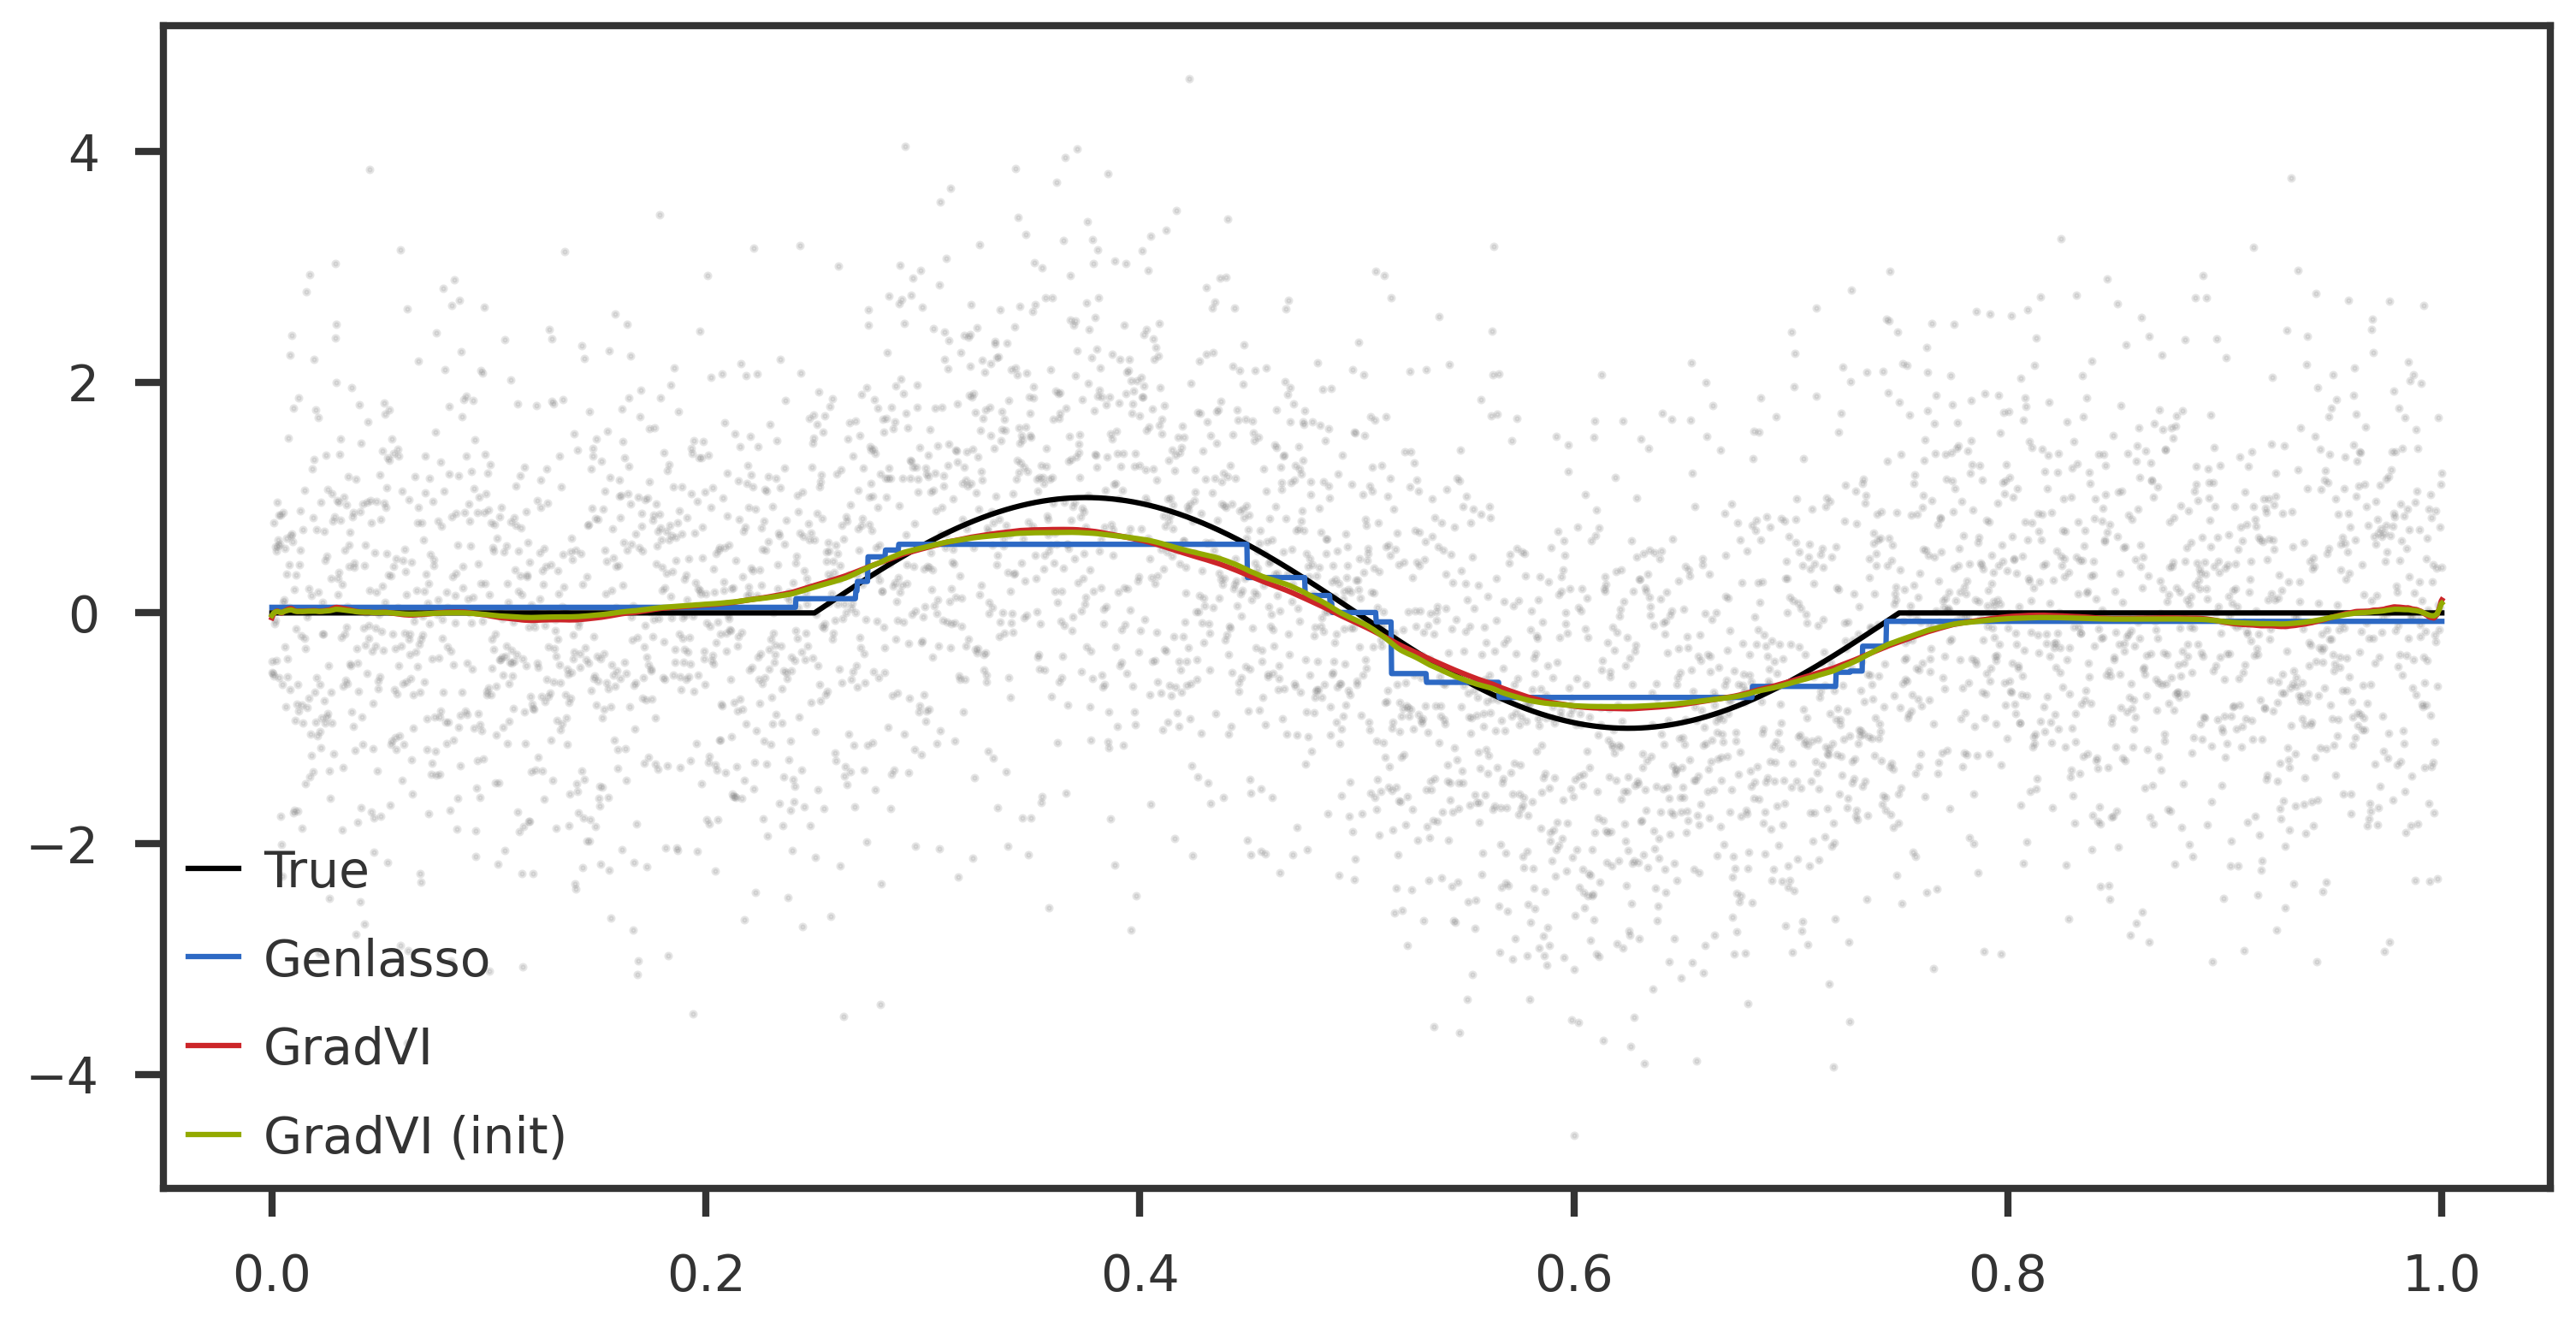

In [31]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(data.x, data.y, s = 2, color = 'grey', alpha = 0.2)
ax1.plot(data.x, data.ytrue, label = 'True', color = 'black')
# ax1.plot(data.x, tf_y, label = 'Genlasso', color = 'dodgerblue')
# ax1.plot(data.x, gv1.ypred, label = 'GradVI', color = 'fuchsia')
# ax1.plot(data.x, gv2.ypred, label = 'GradVI (init)', color = 'tomato')
ax1.plot(data.x, tf_y, label = 'Genlasso')
ax1.plot(data.x, gv1.ypred, label = 'GradVI')
ax1.plot(data.x, gv2.ypred, label = 'GradVI (init)')

ax1.legend()

#fig.savefig("trendfiltering_example_014.png", bbox_inches = 'tight')
plt.show()